<a href="https://colab.research.google.com/github/WolfDev8675/RepoSJX7/blob/Assign5_miscellaneous/Task_GC_02/Task_Code02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2:
## Problem Statement : Perform Logistic Regression on the given data and obtain the required results as asked in the question

> ### Question

In [1]:
#!usr/bin/python

#Problem Statement:
#In this project we will be working with a fake advertising data set, indicating whether or not 
#a particular internet user clicked on an Advertisement. We will try to create a model that 
#will predict whether or not they will click on an ad based off the features of that user.

#This data set contains the following features:

#    'Daily Time Spent on Site': consumer time on site in minutes
#    'Age': cutomer age in years
#    'Area Income': Avg. Income of geographical area of consumer
#    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
#    'Ad Topic Line': Headline of the advertisement
#    'City': City of consumer
#    'Male': Whether or not consumer was male
#    'Country': Country of consumer
#    'Timestamp': Time at which consumer clicked on Ad or closed window
#    'Clicked on Ad': 0 or 1 indicated clicking on Ad
# ..*

In [2]:
# imports
import numpy as NP
import pandas as PD
import matplotlib.pyplot as PLT
import seaborn as SNS
import scipy.stats as STAT
from sklearn.model_selection import train_test_split as tr_te_sp
from sklearn.preprocessing import StandardScaler as Std_Sc
from sklearn.linear_model import LogisticRegression as Log_Reg 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_score

> ### Access Data

In [3]:
# import data 
data_B= PD.read_csv("https://raw.githubusercontent.com/WolfDev8675/RepoSJX7/Assign5_miscellaneous/Task_GC_02/advertising.csv")

> ### Information in the dataset

In [4]:
#data _informations
print("\n\n Dataset Head  \n",data_B.head())
print("\n\n Information \n");data_B.info()
print("\n\n Description \n",data_B.describe())



 Dataset Head  
    Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]


 Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   C

> ### Exploration of the data (_EDA_)



 Number of user to the Age 


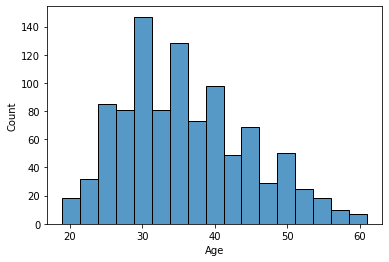



 Area Income vs Age 


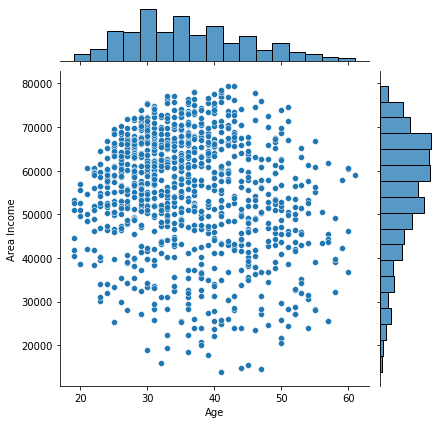



  Daily Time Spent on Site vs Age 


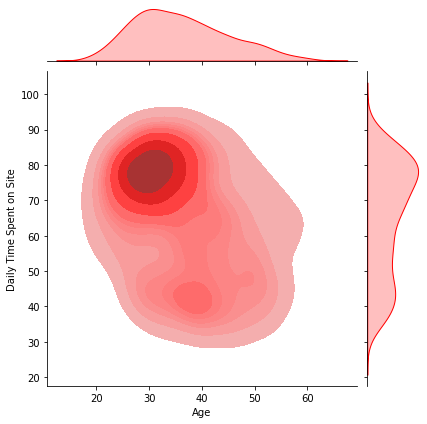



  Daily Internet Usage vs Daily Time Spent on Site 


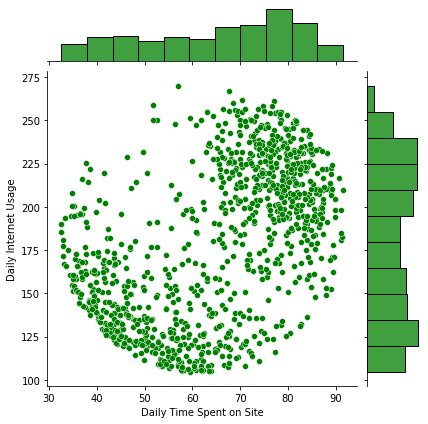



  Clicked on Ad field's comparison with other fields 


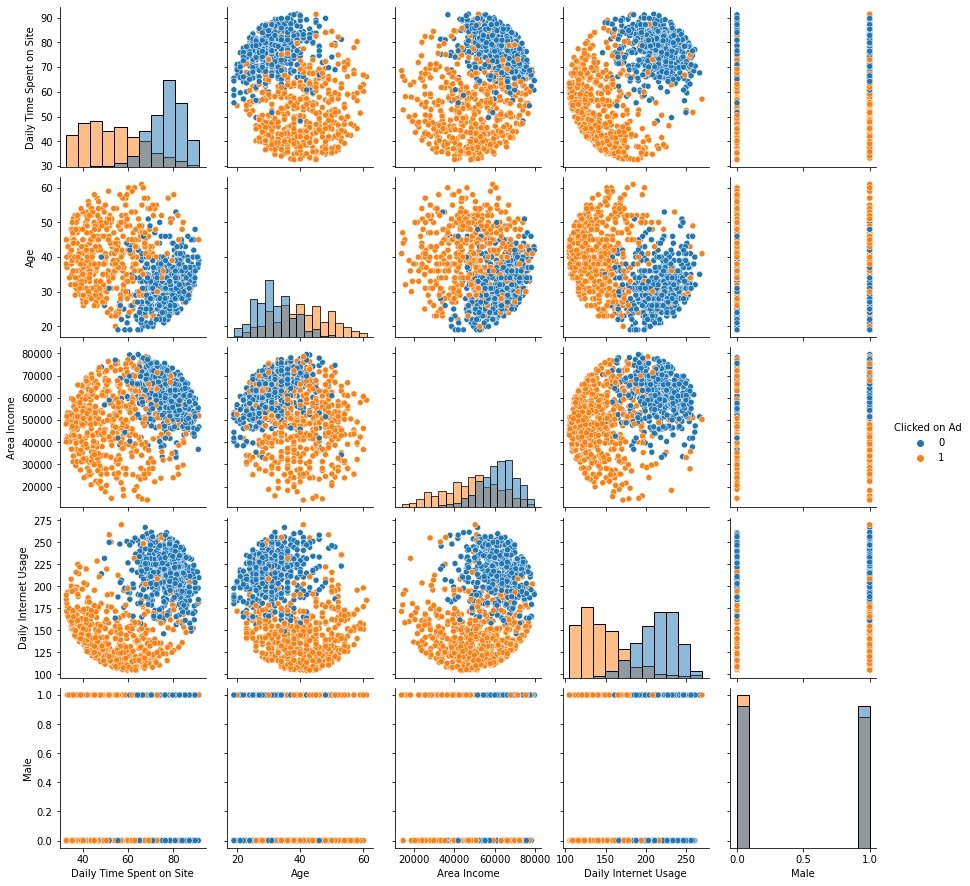

In [5]:
# Exploratory Data analysis 

print("\n\n Number of user to the Age ")
SNS.histplot(data_B,x='Age');PLT.show();
print("\n\n Area Income vs Age ")
SNS.jointplot(x="Age",y="Area Income",data=data_B,kind='scatter');PLT.show();
print("\n\n  Daily Time Spent on Site vs Age ")
SNS.jointplot(x="Age",y="Daily Time Spent on Site",data=data_B,kind='kde',color='r',fill=True);PLT.show();
print("\n\n  Daily Internet Usage vs Daily Time Spent on Site ")
SNS.jointplot(y="Daily Internet Usage",x="Daily Time Spent on Site",data=data_B,kind='scatter',color='g');PLT.show();
print("\n\n  Clicked on Ad field's comparison with other fields ")
SNS.pairplot(data=data_B,hue='Clicked on Ad',diag_kind="hist");PLT.show();

> ### Partitioning data into X and Y Components

In [6]:
#Parititioning the data into componenets 
X=data_B[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y=data_B['Clicked on Ad']

> ### Splitting the data into test and train sets

In [7]:
# Dataset spliting 
X_train, X_test, y_train, y_test= tr_te_sp(X,y, test_size=0.25, random_state=0)

> ### Logistic Regression model 

In [8]:
#Logistic Modeling 
model=Log_Reg(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

> ### Predictions from the trained model

In [9]:
#Predictions
y_pred=model.predict(X_test)

> ### Metrics information

In [10]:
# Metics study 
cnf_mat=confusion_matrix(y_test,y_pred)
print("\n\n Confusion Matix : \n",cnf_mat)
acc_sc=accuracy_score(y_test,y_pred)
print("\n\n Accuracy Score : ",acc_sc)



 Confusion Matix : 
 [[127   9]
 [ 13 101]]


 Accuracy Score :  0.912


> ### Predicted Probabilities

In [11]:
#Predicted Probabilities 
y_score=model.predict_proba(X_test)[:,1]

> ### Classification Report

In [12]:
# Classification Report
print("\n\n Classification Report  \n ",classification_report(y_test,y_pred))


#..
# End of Code 
#.. 



 Classification Report  
                precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



END